# A Young Man's Game?
## Are great scientific acheivements (in physics) only made during youth?

In [1]:
import matplotlib.pyplot as plt               # for visuals
from matplotlib.ticker import MultipleLocator
%matplotlib inline
import pandas as pd                           # for data table manipulation
from scipy.stats import lognorm               # for statistics

### Age Distribution

In [2]:
# import the csv data
data = pd.DataFrame(pd.read_csv("data.csv", sep=",", header=0))
data

,Discovery / ID-Title (not necessarily the original title),Published,Author,Birth Year,Author Age,Field,Number of previous publications,h-index today,h-idex then,L-index today
0,Prinzip einer Methode zur Herstellung von Kana...,1924,Gustav Ising,1883,41,Accelerator physics,NaN,NaN,NaN,NaN
1,About a new principle for producing high voltages,1928,Rolf Widerøe,1902,26,Accelerator physics,NaN,NaN,NaN,NaN
2,The Acceleration of Electrons by Magnetic Indu...,1941,Donald William Kerst,1911,30,Accelerator physics,NaN,NaN,NaN,NaN
3,Electronic Orbits in the Induction Accelerator,1941,Donald William Kerst,1911,30,Accelerator physics,NaN,NaN,NaN,NaN
4,The Strong Focusing Sychroton - A New High Ene...,1952,Ernest Courant,1920,32,Accelerator physics,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
143,Reflections on the Motive Power of Heat and on...,1824,Nicolas Léonard Sadi Carnot,1796,28,Statistical mechanics & thermodynamics,NaN,NaN,NaN,NaN
144,On the thermodynamics of chemical processes,1882,Hermann Helmholtz,1821,61,Statistical mechanics & thermodynamics,NaN,NaN,NaN,NaN
145,On the Equilibrium of Heterogeneous Substances,1876,Josiah Willard Gibbs,1839,37,Statistical mechanics & thermodynamics,NaN,NaN,NaN,NaN
146,Scaling laws for Ising models near Tc,1966,Leo Philip Kadanoff,1937,29,Statistical mechanics & thermodynamics,NaN,NaN,NaN,NaN


[41, 26, 30, 30, 32, 47, 39, 38, 45, 57, 40, 64, 69, 48, 55, 38, 35, 50, 43, 56, 52, 41, 64, 40, 70, 38, 48, 46, 42, 32, 27, 34, 46, 37, 39, 36, 50, 41, 32, 26, 40, 37, 24, 40, 74, 87, 45, 52, 30, 51, 34, 37, 38, 35, 50, 42, 30, 37, 41, 30, 38, 44, 37, 38, 40, 62, 26, 27, 49, 26, 29, 39, 36, 38, 51, 46, 29, 51, 38, 35, 48, 53, 64, 30, 34, 24, 22, 36, 24, 25, 44, 54, 38, 37, 30, 39, 46, 34, 56, 30, 61, 74, 62, 61, 31, 31, 31, 58, 44, 33, 29, 41, 33, 30, 27, 31, 43, 26, 58, 51, 34, 33, 32, 24, 39, 26, 28, 29, 24, 32, 26, 28, 31, 32, 27, 32, 35, 39, 26, 26, 43, 37, 45, 28, 61, 37, 29, 38]

maximum age: 87
minimum age: 22


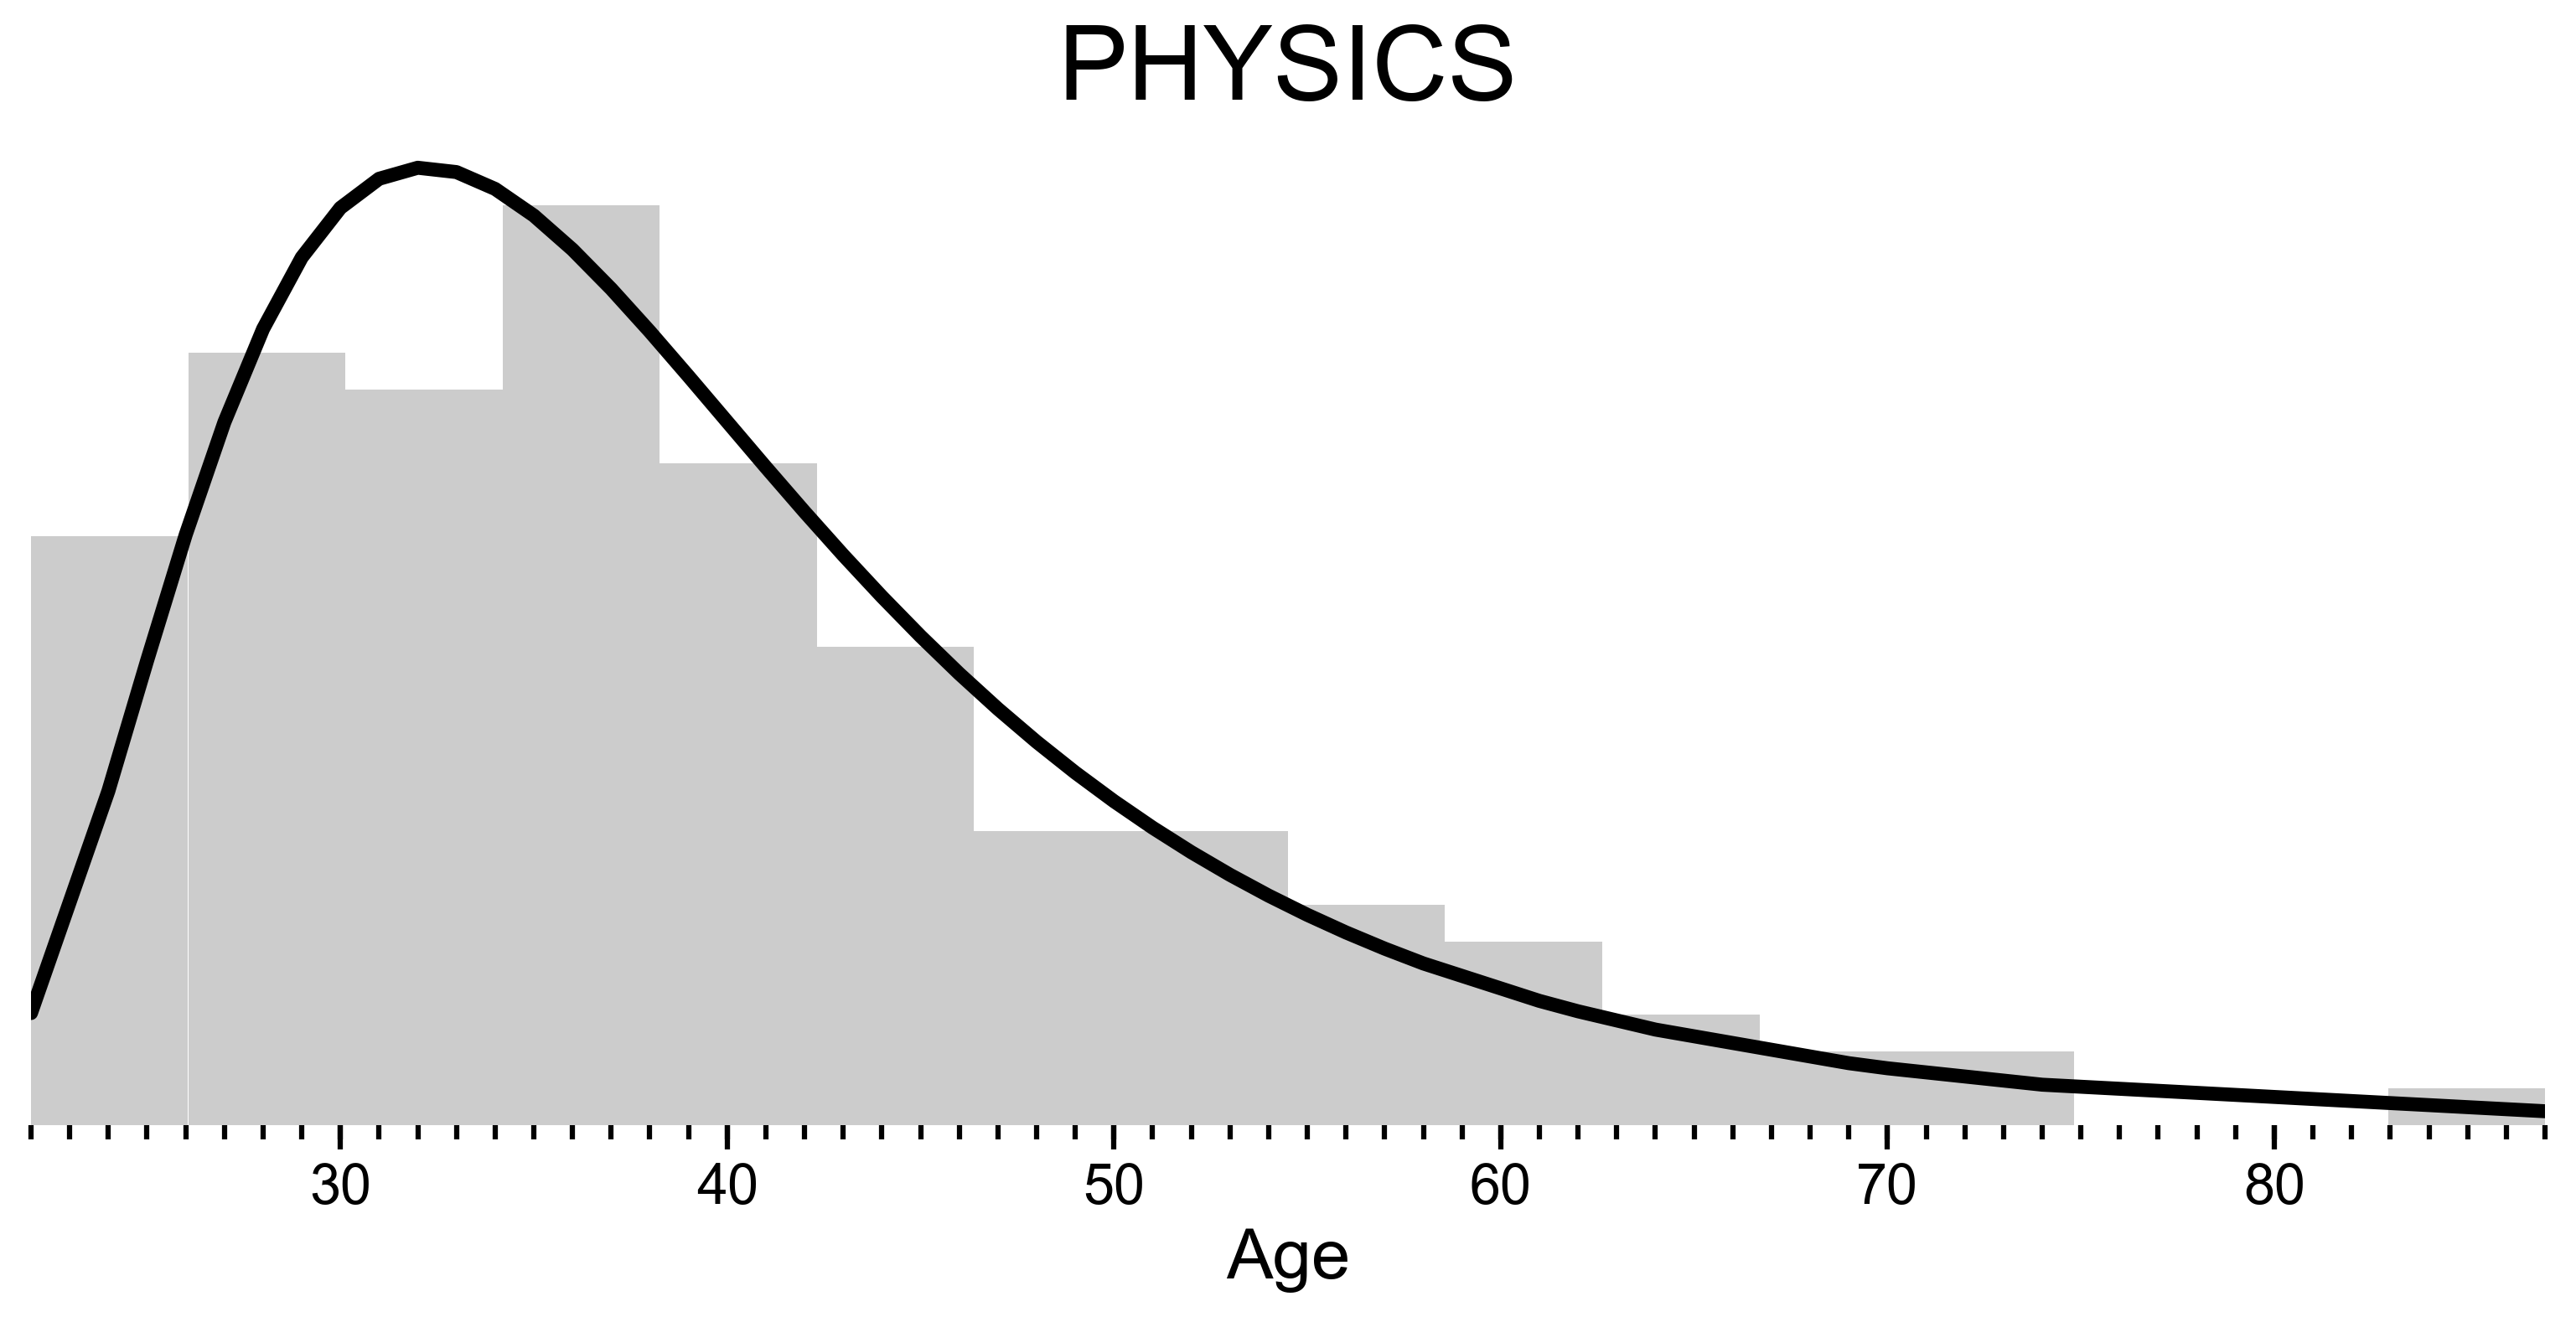

In [5]:
# get relevant data
pub_age_list = [age for age in data[:]["Author Age"]]
print(pub_age_list)
print("\nmaximum age: " + str(max(pub_age_list)))
print("minimum age: " + str(min(pub_age_list)))
# display the age distribution as a histogram for when papers are published
# plot style
plt.style.use("default")
plt.style.use("seaborn-dark")
plt.style.use("grayscale")
# create figure
fig = plt.figure(figsize=(10,4), dpi=300)
fig.patch.set_facecolor('white')
# create axes with histogram    
ax = plt.Axes(fig=fig, rect=[0,0, 1, 1])

ax.hist(pub_age_list, bins=16, range=None, density=True, alpha=0.2, histtype='bar', 
                       align='mid', orientation='vertical', rwidth=None, 
                       log=False, color="black", label=None, stacked=False)
# fit with lognormal distribution
shape,loc,scale = lognorm.fit(sorted(pub_age_list))
pdf = lognorm.pdf(sorted(pub_age_list), shape, loc, scale)
ax.plot(sorted(pub_age_list), pdf, lw=4)
# set axes specifications for visual clarity
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='both', width=1.5)
ax.tick_params(which='minor', length=4, color="black")
ax.tick_params(which='major', length=7, color="black", labelsize=16)
ax.set_yticks([])
ax.set_xlim([22, 87])
ax.set_xlabel("Age", size=20)
ax.set_title("PHYSICS", size=30)
# add axes to figure
fig.add_axes(ax)
# plot the whole thing
plt.savefig("physics_age_distribution", bbox_inches="tight", facecolor="white")